In [1]:
# Import local modules
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from persistence import load_all_classifiers
from plotting import plot_scores
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


---
## Load classifiers

In [3]:
classifiers = load_all_classifiers()

Loading model tag_1
Loading model tag_11
Loading model tag_2
Loading model tag_3
Loading model tag_5
Loading model tag_6
Loading model tag_9


/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
def plot_grid_search_results(meta):
    df = pd.DataFrame.from_dict(meta['grid_search'])
    df['n_estimators'] = [d['n_estimators'] for d in df.params]
    df['class_weight'] = [d['class_weight'] for d in df.params]

    # Plot grid search results by estimator count
    for n_estimator in df.n_estimators.unique():
        samples = df[df['n_estimators'] == n_estimator]
        samples = samples.set_index('class_weight')
        samples = samples.drop(['n_estimators', 'params'], axis=1)
        ax = samples.plot()
        ax.set_xticklabels(samples.index, rotation='vertical')
        plt.title('Tag: %d Estimators: %d' % (meta['tag_id'], n_estimator))
        plt.show()

1


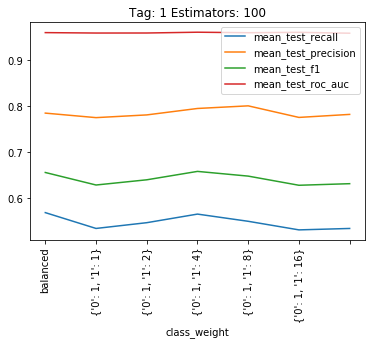

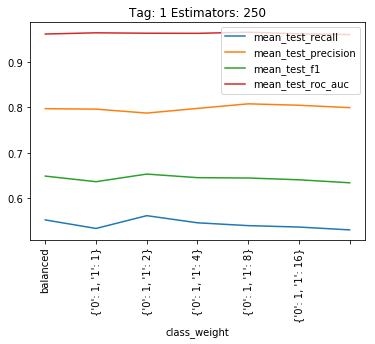

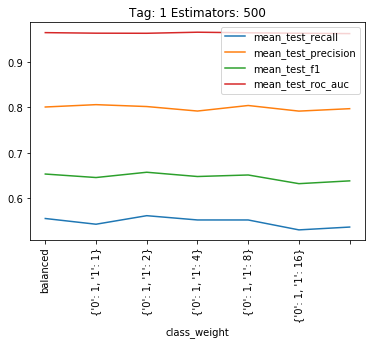

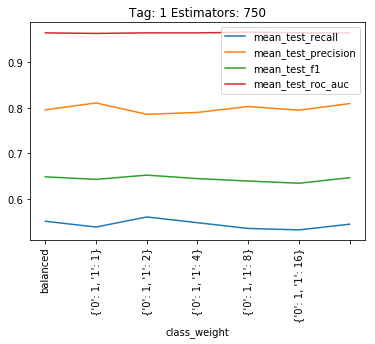

11


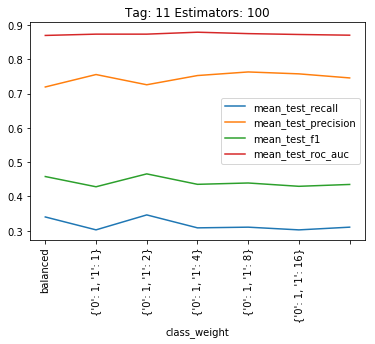

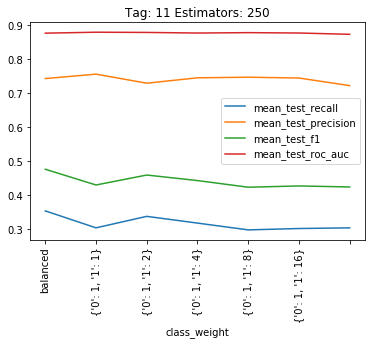

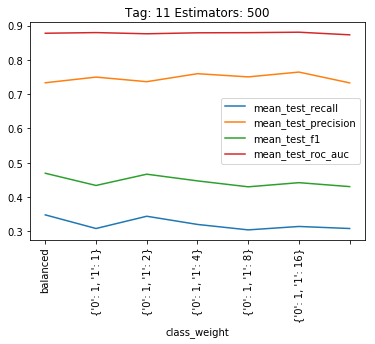

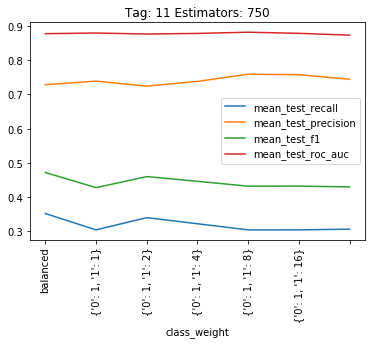

2


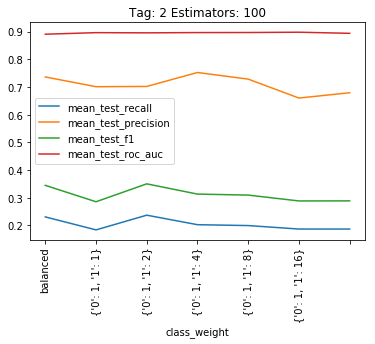

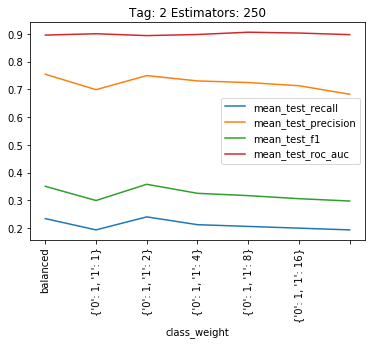

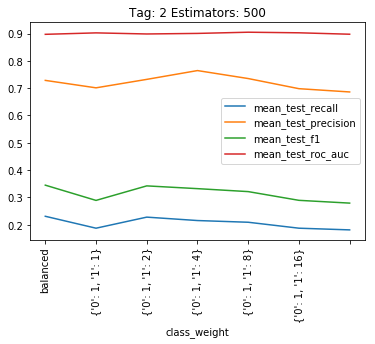

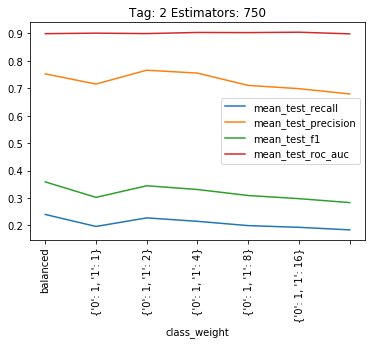

3


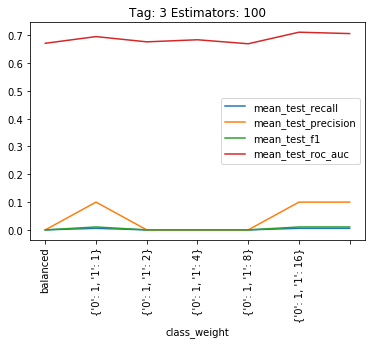

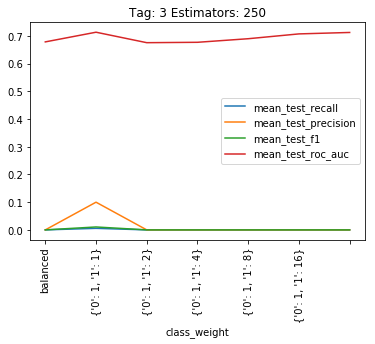

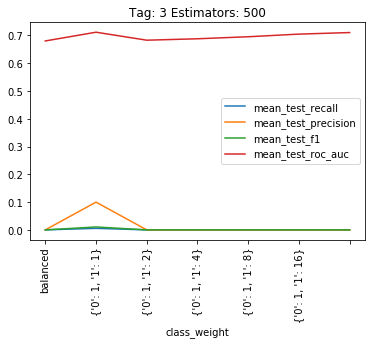

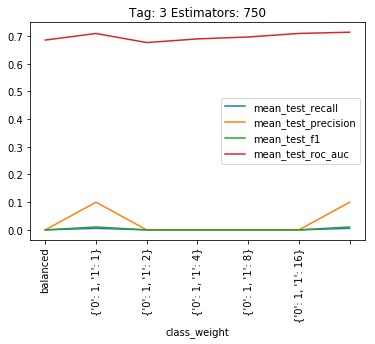

5


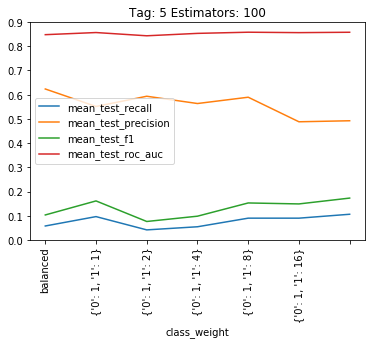

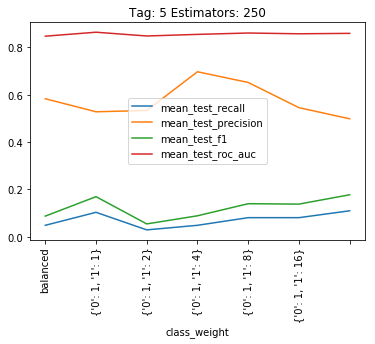

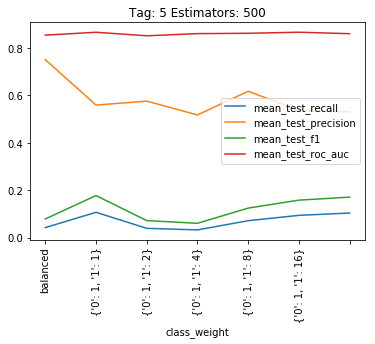

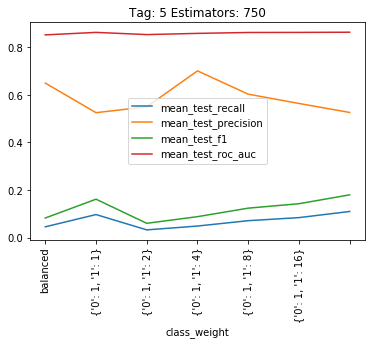

6


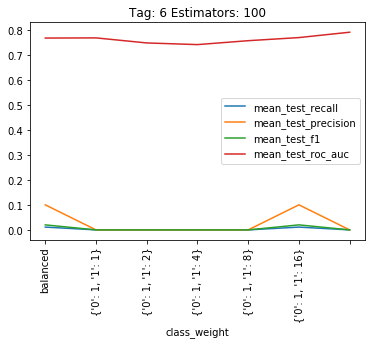

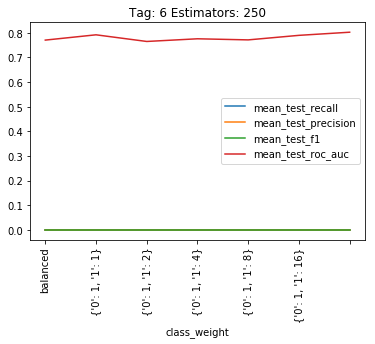

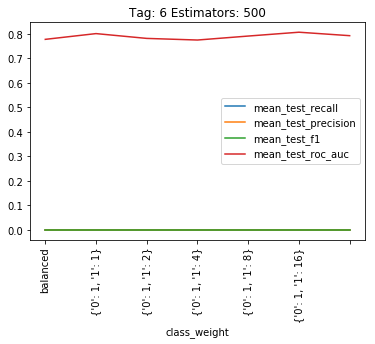

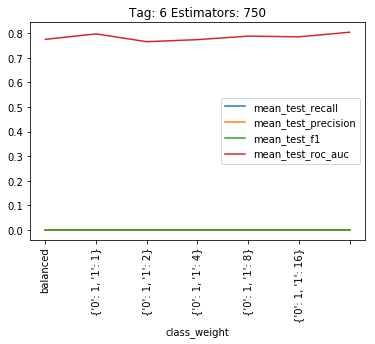

9


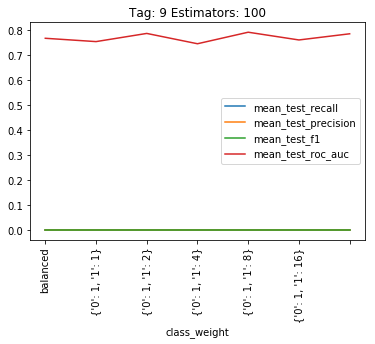

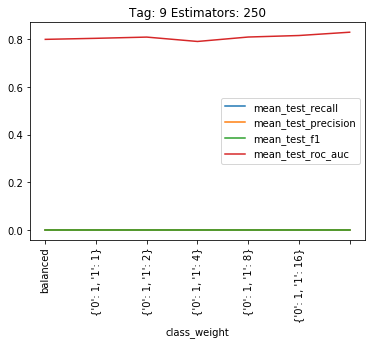

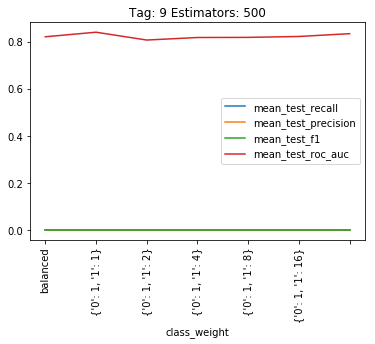

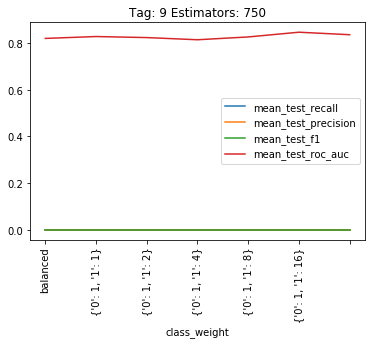

In [5]:
for tag, clf in classifiers.items():
    meta = clf['meta']
    print(meta['tag_id'])
    plot_grid_search_results(meta)